Code Reference: https://towardsdatascience.com/how-to-import-google-sheets-data-into-a-pandas-dataframe-using-googles-api-v4-2020-f50e84ea4530

- Step 1: Enable GoogleSheetsAPI from: https://developers.google.com/sheets/api/quickstart/python
- Step 2: Save In resulting dialog click DOWNLOAD CLIENT CONFIGURATION and save the file credentials.json to your working directory
- Step 3: Run the below code in the same folder where you have saved the credentials file

In [1]:
#Importing libraries

import pickle
import os.path
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request


#Defining a function to return credentials stored in credentials.json
def gsheet_api_check(SCOPES):
    creds = None
    if os.path.exists('token.pickle'):
        with open('token.pickle', 'rb') as token:
            creds = pickle.load(token)
    if not creds or not creds.valid:
        if creds and creds.expired and creds.refresh_token:
            creds.refresh(Request())
        else:
            flow = InstalledAppFlow.from_client_secrets_file(
                'credentials.json', SCOPES)
            creds = flow.run_local_server(port=0)
        with open('token.pickle', 'wb') as token:
            pickle.dump(creds, token)
    return creds


#Defining a function to pull data from a google sheet
from googleapiclient.discovery import build
def pull_sheet_data(SCOPES,SPREADSHEET_ID,RANGE_NAME):
    creds = gsheet_api_check(SCOPES)
    service = build('sheets', 'v4', credentials=creds)
    sheet = service.spreadsheets()
    result = sheet.values().get(
        spreadsheetId=SPREADSHEET_ID,
        range=RANGE_NAME).execute()
    values = result.get('values', [])
    
    if not values:
        print('No data found.')
    else:
        rows = sheet.values().get(spreadsheetId=SPREADSHEET_ID,
                                  range=RANGE_NAME).execute()
        data = rows.get('values')
        print("COMPLETE: Data copied")
        return data
    
#Implementing the pull_sheet_data function to import data as a pandas DataFrame  

import pandas as pd
SCOPES = ['https://www.googleapis.com/auth/spreadsheets']
SPREADSHEET_ID = '1ltqowGNwLkIP3arcMqGnNNLC7EEN92ru8vwlNlc3INM'
RANGE_NAME = 'NamedRange1'
data = pull_sheet_data(SCOPES,SPREADSHEET_ID,RANGE_NAME)
df = pd.DataFrame(data[1:], columns=data[0])
df

COMPLETE: Data copied


,Student Name,Demo Status,Enrollment Status,POC
0,ABC,Yes,No,A
1,DEF,No,Yes,A
2,GHI,No,No,B
3,JKL,Yes,Yes,B
4,MNO,Yes,No,C
5,PQR,No,Yes,A


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

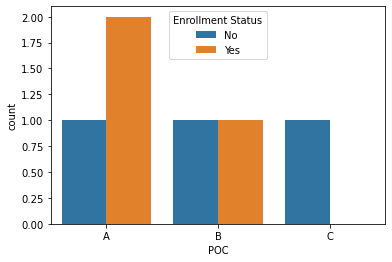

In [4]:
sns.countplot(x='POC',data=df,hue='Enrollment Status')